In [1]:
!pip install requests pandas openpyxl

In [3]:
import requests
import pandas as pd

In [5]:
api_url = "https://jsonplaceholder.typicode.com/users"
response = requests.get(api_url)

if response.status_code == 200:
    data = response.json()
else:
    print(f"Erro ao acessar a API: {response.status_code}")
    data = []

In [6]:
df = pd.DataFrame(data)
df.head()

,id,name,username,email,address,phone,website,company
0,1,Leanne Graham,Bret,Sincere@april.biz,"{'street': 'Kulas Light', 'suite': 'Apt. 556',...",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu..."
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"{'street': 'Victor Plains', 'suite': 'Suite 87...",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac..."
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"{'street': 'Douglas Extension', 'suite': 'Suit...",1-463-123-4447,ramiro.info,"{'name': 'Romaguera-Jacobson', 'catchPhrase': ..."
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"{'street': 'Hoeger Mall', 'suite': 'Apt. 692',...",493-170-9623 x156,kale.biz,"{'name': 'Robel-Corkery', 'catchPhrase': 'Mult..."
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"{'street': 'Skiles Walks', 'suite': 'Suite 351...",(254)954-1289,demarco.info,"{'name': 'Keebler LLC', 'catchPhrase': 'User-c..."


In [8]:
csv_filename = "report_users.csv"
df.to_csv(csv_filename, index=False)

excel_filename = "report_users.xlsx"
df.to_excel(excel_filename, index=False)

print(f"Saved reports: {csv_filename} e {excel_filename}")

Saved reports: report_users.csv e report_users.xlsx


In [9]:
!pip install matplotlib

In [11]:
import matplotlib.pyplot as plt

city_counts = df['address'].apply(lambda x: x['city']).value_counts()

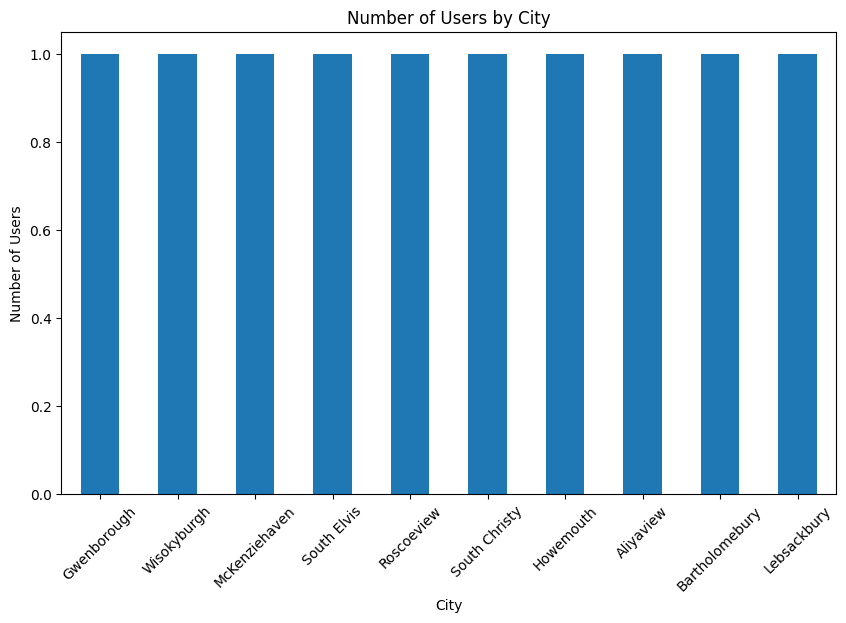

In [18]:
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar')
plt.title('Number of Users by City')
plt.xlabel('City')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

In [13]:
!pip install seaborn

In [14]:
import seaborn as sns

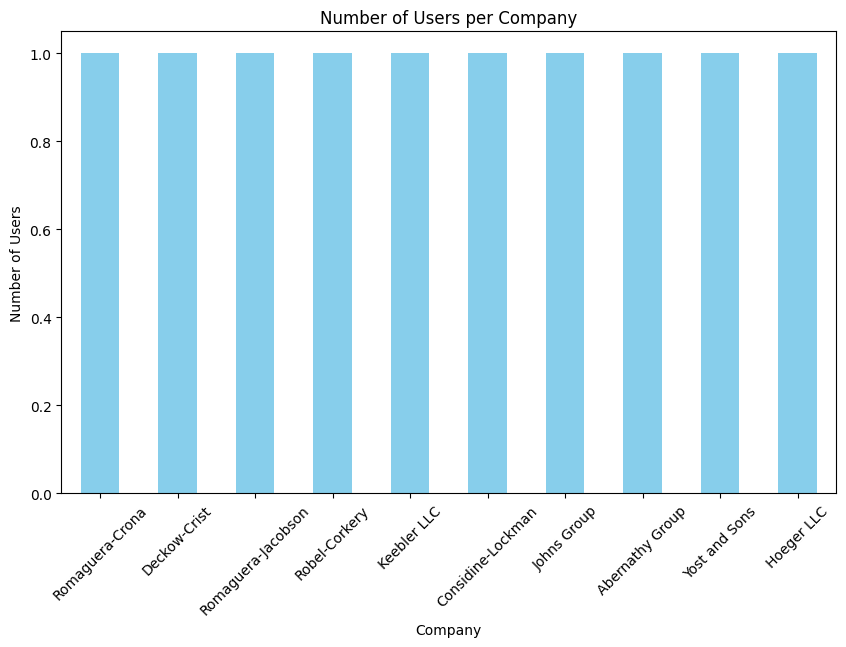

In [19]:
# Count the number of users per company
company_counts = df['company'].apply(lambda x: x['name']).value_counts()

# Generate the bar chart
plt.figure(figsize=(10, 6))
company_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Users per Company')
plt.xlabel('Company')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

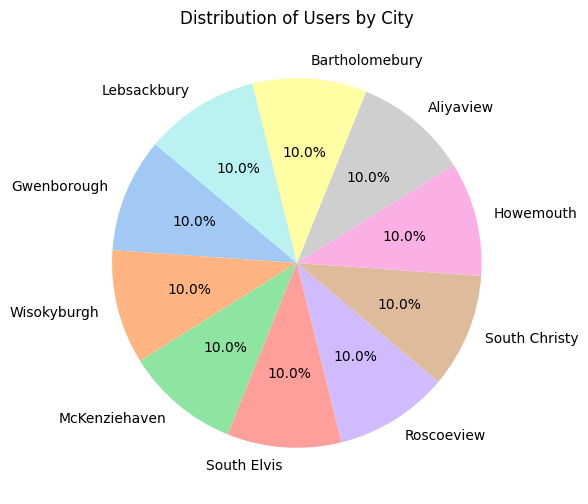

In [21]:
# Generate the pie chart
plt.figure(figsize=(10, 6))
city_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Users by City')
plt.ylabel('')  # Remove label from y-axis bar
plt.show()

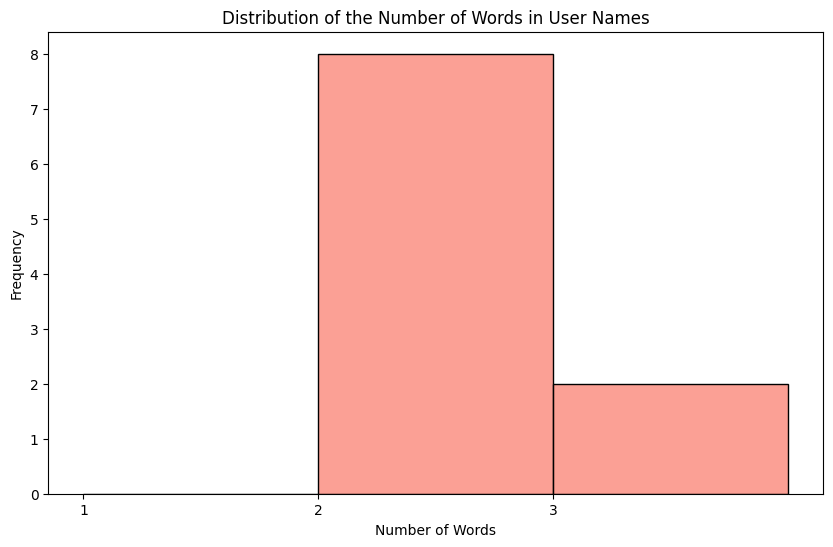

In [22]:
# Count the number of words in user names
name_word_counts = df['name'].apply(lambda x: len(x.split()))

# Generate the histogram
plt.figure(figsize=(10, 6))
sns.histplot(name_word_counts, bins=range(1, name_word_counts.max() + 2), kde=False, color='salmon')
plt.title('Distribution of the Number of Words in User Names')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xticks(range(1, name_word_counts.max() + 1))
plt.show()